#### ❇️ Face Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
import kornia as K
from kornia.contrib import FaceDetector, FaceDetectorResult

# select the device and type
device = torch.device('cpu')  # use 'cuda:0'
dtype = torch.float32

❇️ Read the image and convert to a torch.Tensor

In [2]:
# load the image and scale (if needed)
img_raw = cv2.imread('squid_games.png', cv2.IMREAD_COLOR)

# preprocess
img = K.image_to_tensor(img_raw, keepdim=False).to(device, dtype)
img = K.color.bgr_to_rgb(img)

img_vis = K.tensor_to_image(img.byte().clone()) 

(-0.5, 1199.5, 1199.5, -0.5)

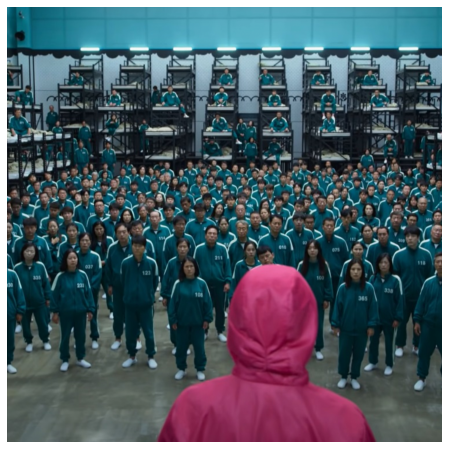

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow(K.tensor_to_image(img.byte()))
plt.axis('off')

❇️ Create the FaceDetector object and apply to the image

In [4]:
# create the detector and find the faces !
face_detection = FaceDetector().to(device, dtype)

with torch.no_grad():
    dets = face_detection(img)

# to decode later the detections
dets = [FaceDetectorResult(o) for o in dets]

❇️ Let draw the detections and save/visualize the image

(-0.5, 1199.5, 1199.5, -0.5)

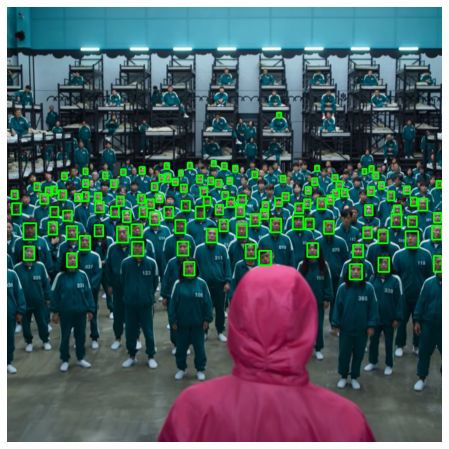

In [5]:
for b in dets:
    if b.score < 0.6:  # skip detections with lower score
        continue
    
    # draw face bounding box around each detected face
    x1, y1 = b.top_left.int().tolist()
    x2, y2 = b.bottom_right.int().tolist()
    img_vis = cv2.rectangle(img_vis, (x1, y1), (x2, y2), (0, 255, 0), 4)

plt.figure(figsize=(8, 8))
plt.imshow(img_vis)
plt.axis('off')

❇️ Hope you enjoyed reading!! 📖 <br>
❇️ follow → @akshay_pachaar 